## iris 과제 - 임소영

#### 데이터 로딩 및 전처리

In [672]:
# 샘플 데이터 관련 모듈
from sklearn.datasets import load_iris

# 데이터 준비 관련 모듈
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder    #데이테 라벨을 바꾸는거

# 학습 & 테스트용 데이터셋 준비 관련 모듈
from sklearn.model_selection import train_test_split

# 스케일링, 전처리 관련 모듈
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures

# 알고리즘 관련 모듈
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

# 성능평가 관련 모듈
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [673]:
file = load_iris()
file.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [674]:
data = file['data']
data = pd.DataFrame(data, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
data

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [675]:
target = file['target']
target = pd.Series(target, name = 'variety')
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int32

In [676]:
file['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [677]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [678]:
# 결측치
data.isna().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
dtype: int64

In [679]:
data.shape

(150, 4)

In [680]:
# 중복값 확인
data.duplicated().sum()

# 1개 존재하긴 하지만 삭제하지 않겠다.

1

In [681]:
data.columns.tolist()

['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

In [682]:
def visual_flier(insert_data):
    # 이상치 확인 by 시각화
    obj = plt.boxplot(insert_data)
    plt.title(f'box plot of data')
    plt.xlabel(insert_data.columns.tolist())
    plt.show()
    
    return obj

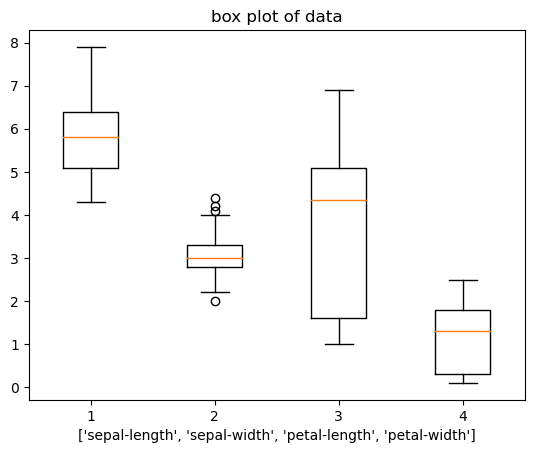

{'whiskers': [<matplotlib.lines.Line2D at 0x2160ce16ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x2160ce15050>,
 'boxes': [<matplotlib.lines.Line2D at 0x2160ce165d0>,
 'medians': [<matplotlib.lines.Line2D at 0x2160d794ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2160e099910>,
 'means': []}

In [683]:
visual_flier(data)

In [684]:
def print_flier(insert_data):
    q1 = insert_data.quantile(0.25)
    q3 = insert_data.quantile(0.75)
    iqr = q3 - q1
    print(f"[ q1 ] \n{q1}\n\n[ q3 ] \n{q3}\n")
    print(f"[ iqr의 범위 ]\n{iqr}\n")
    
    print('------------------ 이상값이 될 기준 계산 ------------------\n')
    
    lower = q1 - 1.5 * iqr
    print(f"[ lower의 값 ]\n{lower} \n")
    upper = q3 + 1.5 * iqr
    print(f"[ upper의 값 ]\n{upper}\n")
    
    mask = insert_data < lower
    print(f"[ lower의 개수 ]\n {mask.sum()}\n")
    mask2 = insert_data > upper
    print(f"[ upper의 개수 ]\n {mask2.sum()}\n")
    
    return lower, upper

In [685]:
lower, upper = print_flier(data)

[ q1 ] 
sepal-length    5.1
sepal-width     2.8
petal-length    1.6
petal-width     0.3
Name: 0.25, dtype: float64

[ q3 ] 
sepal-length    6.4
sepal-width     3.3
petal-length    5.1
petal-width     1.8
Name: 0.75, dtype: float64

[ iqr의 범위 ]
sepal-length    1.3
sepal-width     0.5
petal-length    3.5
petal-width     1.5
dtype: float64

------------------ 이상값이 될 기준 계산 ------------------

[ lower의 값 ]
sepal-length    3.15
sepal-width     2.05
petal-length   -3.65
petal-width    -1.95
dtype: float64 

[ upper의 값 ]
sepal-length     8.35
sepal-width      4.05
petal-length    10.35
petal-width      4.05
dtype: float64

[ lower의 개수 ]
 sepal-length    0
sepal-width     1
petal-length    0
petal-width     0
dtype: int64

[ upper의 개수 ]
 sepal-length    0
sepal-width     3
petal-length    0
petal-width     0
dtype: int64


In [686]:
def drop_flier(insert_data, col_name):
    print('-------------------- 이상값 제거 --------------------\n')

    #어쨰서 둘의 반환값이 같을까? 컬럼별로 적용하지 않아서 그런걸까?
    #data[~mask].shape
    #data[mask].shape
    #이렇게 하면 데이터 프레임 전체에서 조건이 맞는걸 구해야하기 때문에 내가 의도한 바와 맞지 않는다.
    #그래서 컬럼별로 필터링을 적용해주어야 한다.

    mask = insert_data[col_name] >= lower[col_name]
    insert_data = insert_data[mask]
    print(f" '{col_name}' 컬럼에서 lower 미만의 값 제거 후 shape: {insert_data.shape}\n")
    
    mask2 = insert_data[col_name] <= upper[col_name]
    insert_data = insert_data[mask2]
    #insert_data = insert_data[insert_data[f"{col_name}"] <= upper[f"{col_name}"]]
    print(f" '{col_name}' 컬럼에서 upper 초과의 값 제거 후 shape: {insert_data.shape}")
    
    return insert_data

In [687]:
data = drop_flier(data, 'sepal-width')
data.shape

-------------------- 이상값 제거 --------------------

 'sepal-width' 컬럼에서 lower 미만의 값 제거 후 shape: (149, 4)

 'sepal-width' 컬럼에서 upper 초과의 값 제거 후 shape: (146, 4)


(146, 4)